# 1. Load raw data and preliminary data check

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
testid = test['PassengerId']
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data = pd.concat([train,test],axis=0).reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [5]:
print('train set shape',train.shape)
print('test set shape',test.shape)
print('all data set shape',data.shape)
data_len = len(data)
print('Age missing',data.Age.isnull().sum(),'   ',
      (data.Age.isnull().sum())/int(data_len)*int(100),'%')
print('Cabin missing',data.Cabin.isnull().sum(),'   ',
      (data.Cabin.isnull().sum())/int(data_len)*int(100),'%')
print('Embarked missing',data.Embarked.isnull().sum(),'   ',
      (data.Embarked.isnull().sum())/int(data_len)*int(100),'%')
print('Fare missing',data.Fare.isnull().sum(),'   ',
      (data.Fare.isnull().sum())/int(data_len)*int(100),'%')

train set shape (891, 12)
test set shape (418, 11)
all data set shape (1309, 13)
Age missing 263     20.091673032849503 %
Cabin missing 1014     77.46371275783041 %
Embarked missing 2     0.15278838808250572 %
Fare missing 1     0.07639419404125286 %


In [6]:
data.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

**After loading the raw data and conducting the preliminary review of the data structure, we get some useful information like the shapes of the train and test data, the column information about the raw data, and data types of each feature. We also notice that, in combined dataset, feature 'Age' has 20.1% missing values, featue 'Cabin' has 77.46% missing values, and feature 'Embarked' has 2 missing values. Null values exist in columns like 'Cabin', 'Age', 'Fare' and 'Embarked'.** 

**Categorical variables are 'Sex', 'Pclass', 'Embarked', 'Cabin', 'Name', 'Ticket', 'SibSp', and 'Parch'. Numerical variables are 'Age', 'Fare', and 'PassengerId'. All the categorical and numerical variables are predictors/features, while 'Survived' is the target variable. All features may be important for predicting the target variable.**



**Feature meanings:**\
***Sex*** -- Passenger gender \
***Pclass*** -- Passenger class \
***Embarked*** -- The port passengers embarked \
***Cabin*** -- Passenger cabin category \
***Name*** -- Passenger name \
***Ticket*** -- Passenger ticket information \
***SibSp*** -- The siblings and spouses number of the Passenger \
***Parch*** -- The parents and children number of the Passenger \
***Age*** -- Passenger age information \
***Fare*** -- The amount of money passenger spend on the ticket

# 2. Feature analysis

Let's take a look at how the features are distributed and how the features are correlated with target variable.

## 2.1 Univariate plots for Numerical variable

skewness:  0.40767
count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


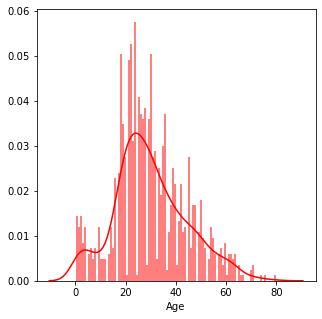

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
skewness = data.Age.skew().round(5)
print('skewness: ',skewness)
print(data['Age'].describe())
plt.figure(figsize=(5, 5))
sns.distplot(data['Age'], color='r', bins=100, hist_kws={'alpha': 0.5});

**The distribution of feature 'age' is almost symmetric which is good for model prediction.**

skewness:  4.36771
count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64


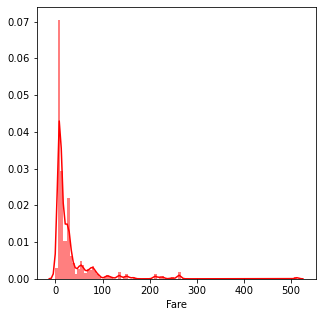

In [8]:
skewness = data.Fare.skew().round(5)
print('skewness: ',skewness)
print(data['Fare'].describe())
plt.figure(figsize=(5, 5))
sns.distplot(data['Fare'], color='r', bins=100, hist_kws={'alpha': 0.5});

**The distribution of feature 'Fare' is clearly skewed, we need modify it to be a symmetric distribution.**

refer to https://www.kaggle.com/eraaz1/a-comprehensive-guide-to-titanic-machine-learning (4.2.1) \
      &  https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling (3.1)

## 2.2 Univariate plots for Categorical variable

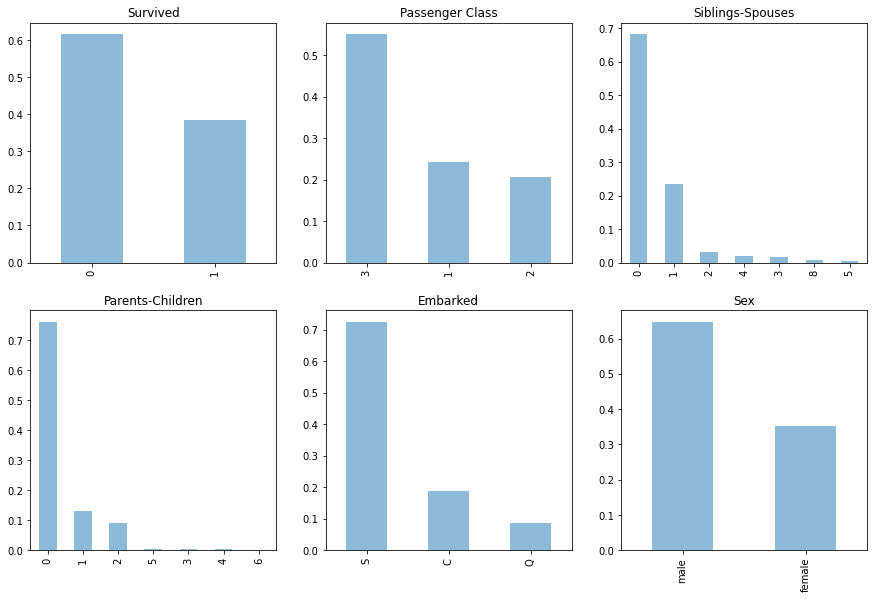

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

plt.subplot2grid((3,3),(0,0))
train.Survived.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Survived')

plt.subplot2grid((3,3),(0,1))
train.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Passenger Class')

plt.subplot2grid((3,3),(0,2))
train.SibSp.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Siblings-Spouses')

plt.subplot2grid((3,3),(1,0))
train.Parch.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Parents-Children')


plt.subplot2grid((3,3),(1,1))
train.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Embarked')

plt.subplot2grid((3,3),(1,2))
train.Sex.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.title('Sex')


plt.show()

## 2.3 Bivariate plots

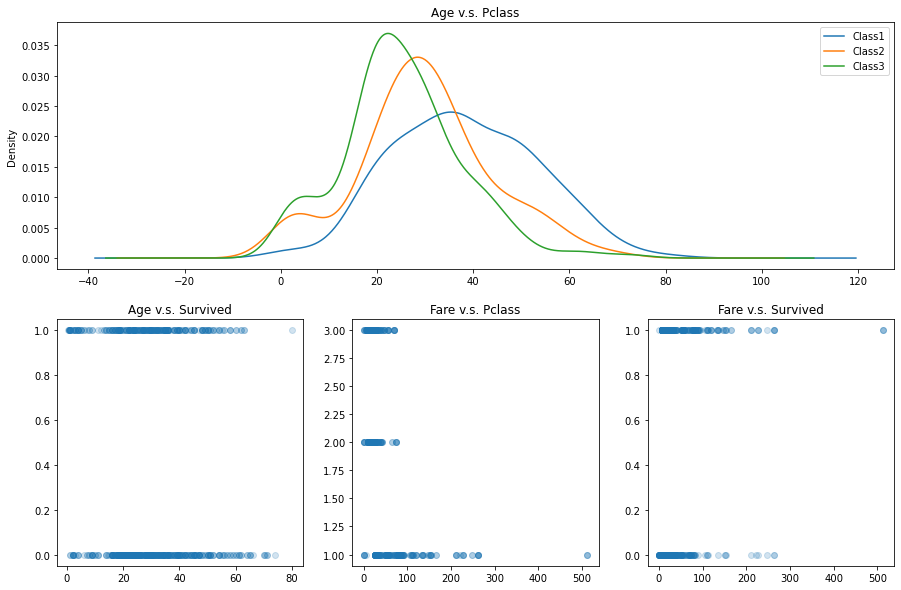

In [10]:
fig = plt.figure(figsize=(15,10))


plt.subplot2grid((2,3),(0,0), colspan=3)
for x in [1,2,3]:
    train.Age[train.Pclass == x].plot(kind='kde')
plt.title('Age v.s. Pclass')
plt.legend(('Class1', 'Class2','Class3'))

plt.subplot2grid((2,3),(1,0))
plt.scatter(train.Age, train.Survived, alpha=.2)
plt.title('Age v.s. Survived')

plt.subplot2grid((2,3),(1,1))
plt.scatter(train.Fare, train.Pclass, alpha=.2)
plt.title('Fare v.s. Pclass')

plt.subplot2grid((2,3),(1,2))
plt.scatter(train.Fare, train.Survived, alpha=.2)
plt.title('Fare v.s. Survived')

plt.show()

Sex       female  male
Survived              
0             81   468
1            233   109


Text(0.5, 1.0, 'Sex v.s. Survived')

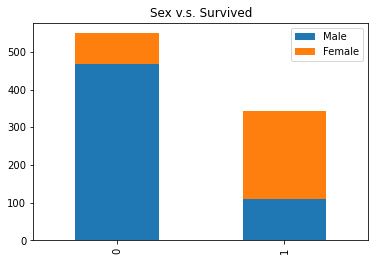

In [11]:
print(pd.pivot_table(train,values='PassengerId',index='Survived',
                  columns='Sex',aggfunc='count'))

Male_sur=train.Survived[train.Sex=='male'].value_counts()
Female_sur=train.Survived[train.Sex=='female'].value_counts()
sig_sex=pd.DataFrame({'Male':Male_sur,'Female':Female_sur})
sig_sex.plot(kind='bar',stacked=True)
plt.title('Sex v.s. Survived')

**Female seems to have more chance to survive(survival rate of female accounts for about 74.2%), which male is more likely to be unsurvived(survival rate is about 18.8%).**

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Text(0.5, 1.0, 'Class v.s. Survived')

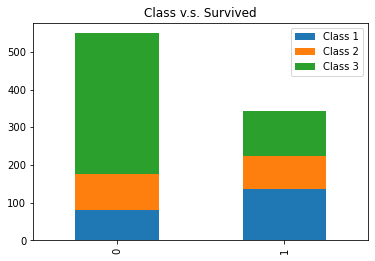

In [12]:
print(pd.pivot_table(train,values='PassengerId',index='Survived',
                  columns='Pclass',aggfunc='count'))

C1_sur=train.Survived[train.Pclass==1].value_counts()
C2_sur=train.Survived[train.Pclass==2].value_counts()
C3_sur=train.Survived[train.Pclass==3].value_counts()
sig_class=pd.DataFrame({'Class 1':C1_sur,'Class 2':C2_sur,'Class 3':C3_sur})
sig_class.plot(kind='bar',stacked=True)
plt.title('Class v.s. Survived')

**Survival rate of class 1 is higher than class 2, and survival rate of class 2 is higher than class 3.**

## 2.4 Multivariate plots

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47


Text(0.5, 1.0, 'Unsurvived Male v.s. Unsurvived Female')

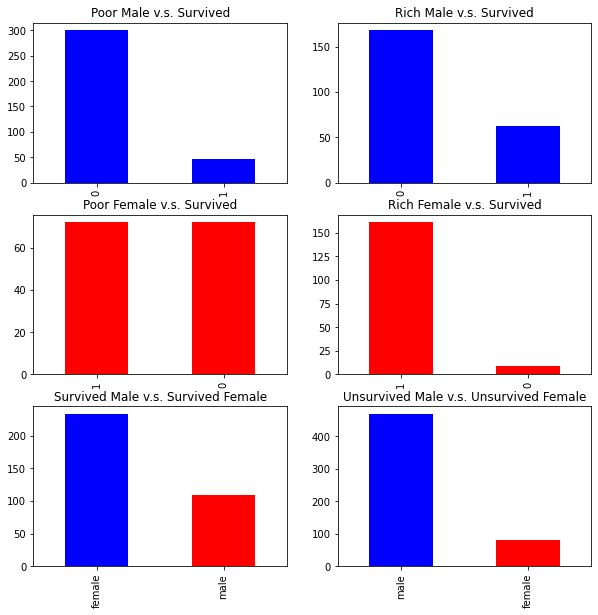

In [13]:
print(pd.pivot_table(train,values='PassengerId',index=['Sex','Survived'],
                  columns='Pclass',aggfunc='count'))


C12_m_sur=train.Survived[train.Pclass!=3][train.Sex=='male'].value_counts()
C3_m_sur=train.Survived[train.Pclass==3][train.Sex=='male'].value_counts()
C12_f_sur=train.Survived[train.Pclass!=3][train.Sex=='female'].value_counts()
C3_f_sur=train.Survived[train.Pclass==3][train.Sex=='female'].value_counts()

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((3,2),(0,0))
train.Survived[train.Pclass==3][train.Sex=='male'].value_counts().plot(kind='bar',color='blue')
plt.title('Poor Male v.s. Survived')

plt.subplot2grid((3,2),(0,1))
train.Survived[train.Pclass!=3][train.Sex=='male'].value_counts().plot(kind='bar',color='blue')
plt.title('Rich Male v.s. Survived')

plt.subplot2grid((3,2),(1,0))
train.Survived[train.Pclass==3][train.Sex=='female'].value_counts().plot(kind='bar',color='red')
plt.title('Poor Female v.s. Survived')

plt.subplot2grid((3,2),(1,1))
train.Survived[train.Pclass!=3][train.Sex=='female'].value_counts().plot(kind='bar',color='red')
plt.title('Rich Female v.s. Survived')

plt.subplot2grid((3,2),(2,0))
train.Sex[train.Survived==1].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Survived Male v.s. Survived Female')

plt.subplot2grid((3,2),(2,1))
train.Sex[train.Survived==0].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Unsurvived Male v.s. Unsurvived Female')

**These plots show that males have low chance of being saved compared to females.** \
**However rich males have slightly more chance to survive.** \
**The female survived-unsurvived rate is way too high than that of male.** \
**Rich females are almost all rescued.** 

**From these plots we may find that gender and class have significant effects on the target variable, especially for feature 'Sex'.**

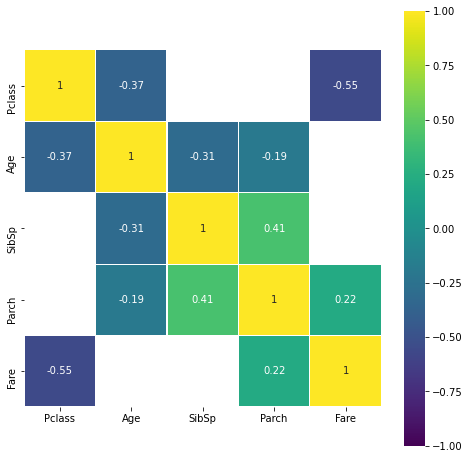

In [14]:
dfc = train.copy()
dfc = dfc.drop(['PassengerId','Survived'], axis=1)
corr = dfc.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr[(corr >= 0.16) | (corr <= -0.16)],cmap='viridis',vmax=1.0,vmin=-1.0,linewidths=0.1,annot=True, annot_kws={"size": 10}, square=True)

**Note that feature 'Pclass', 'SibSp', and 'Parch' have no missing values, and they have a relatively strong correlation with feature 'Age' and 'Fare'. If one feature has a large number of missing values (like Age), the distribution of the missing value may differ by group and category that this feature correlated.**

# 3. Data preparation and filling missing values

## 3.1 Data preparation

In [15]:
y_train = train.Survived
X_train = train.drop(['PassengerId','Survived'], axis=1)

X_test = test.drop(['PassengerId'], axis=1)

alldata = X_train.append(X_test)
print(alldata.shape)
alldata.head()

(1309, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.2 Filling missing values

In [16]:
alldata.Embarked.fillna('S', inplace=True) # replace with the most frequent one. Use train.Embarked.value_counts()
alldata['Fare'] = alldata['Fare'].fillna(alldata['Fare'].median()) 
alldata['Fare'] = alldata.Fare.map(lambda x: np.log(x) if x>0 else 0)

skewness:  0.56943
count    1309.000000
mean        2.910408
std         1.003886
min         0.000000
25%         2.066331
50%         2.670985
75%         3.442819
max         6.238967
Name: Fare, dtype: float64


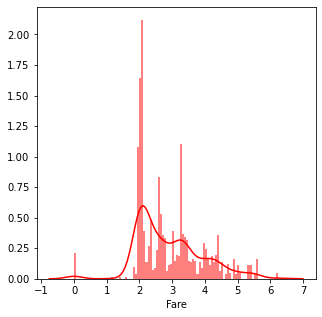

In [17]:
skewness = alldata.Fare.skew().round(5)
print('skewness: ',skewness)
print(alldata['Fare'].describe())
plt.figure(figsize=(5, 5))
sns.distplot(alldata['Fare'], color='r', bins=100, hist_kws={'alpha': 0.5});

# 4. Feature engineering

## 4.1 Cabin

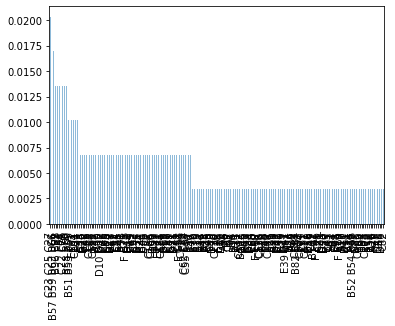

In [18]:
alldata.Cabin.value_counts(normalize=True).plot(kind='bar', alpha=.5)

In [19]:
alldata["Cabin"] = pd.Series(['N' if pd.isnull(i) else i[0] for i in alldata['Cabin'] ])

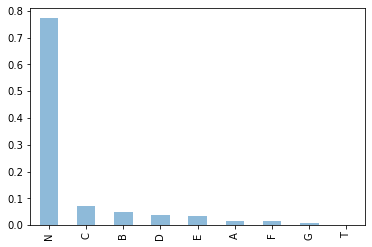

In [20]:
alldata.Cabin.value_counts(normalize=True).plot(kind='bar', alpha=.5)

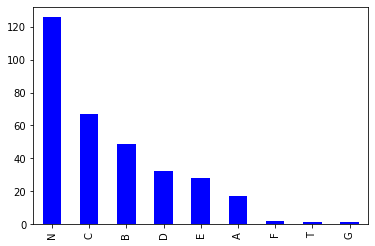

In [21]:
alldata.Cabin[alldata.Pclass==1].value_counts().plot(kind='bar',color='blue')

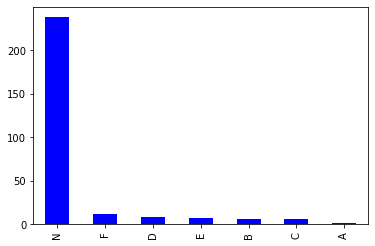

In [22]:
alldata.Cabin[alldata.Pclass==2].value_counts().plot(kind='bar',color='blue')

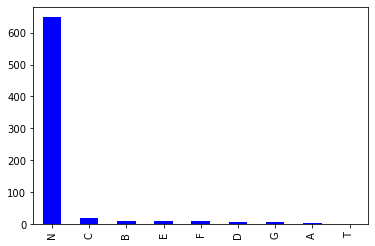

In [23]:
alldata.Cabin[alldata.Pclass==3].value_counts().plot(kind='bar',color='blue')

In [24]:
Cabin_row = []
Cabin_row = alldata['Cabin'].index
# replace nan cabin with class median data.groupby('Pclass').Cabin.value_counts()

for i in Cabin_row:
    if ((alldata['Cabin'].iloc[i] == 'N') & (alldata['Pclass'].iloc[i] == 1)):
        alldata['Cabin'].iloc[i] = 'C'
    elif ((alldata['Cabin'].iloc[i] == 'N') & (alldata['Pclass'].iloc[i] == 2)):
        alldata['Cabin'].iloc[i] = 'F'
    elif ((alldata['Cabin'].iloc[i] == 'N') & (alldata['Pclass'].iloc[i] == 3)):
        alldata['Cabin'].iloc[i] = 'C'
    elif (alldata['Cabin'].iloc[i] == 'T'):
        alldata['Cabin'].iloc[i] = 'C'
    else:
        alldata['Cabin'].iloc[i] = alldata['Cabin'].iloc[i]

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


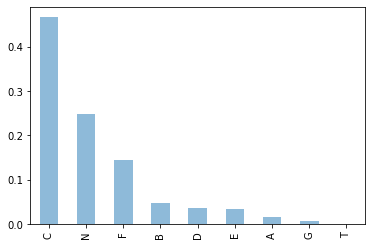

In [25]:
alldata.Cabin.value_counts(normalize=True).plot(kind='bar', alpha=.5)

We rename missing values with 'N', and fill missing values considering the distribution of feature 'Pclass'.

## 4.2 Name

In [26]:
names = set() # adds a given element to a set if the element is not present in the set
for name in alldata['Name']:
    names.add(name.split(',')[1].split('.')[0].strip())
print(names)

{'Rev', 'Mme', 'Mlle', 'Major', 'Mr', 'Capt', 'Miss', 'Sir', 'Dona', 'the Countess', 'Col', 'Don', 'Dr', 'Ms', 'Lady', 'Mrs', 'Jonkheer', 'Master'}


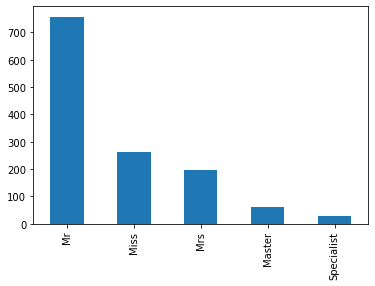

In [27]:
alldata['Title'] = alldata['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
alldata['Title'] = alldata['Title'].replace(['Lady','Sir','Dr','Rev','Col','Major','Dona','Jonkheer','the Countess','Don','Capt'], 'Specialist')
alldata['Title'] = alldata['Title'].replace('Ms','Miss')
alldata['Title'] = alldata['Title'].replace('Mlle','Miss')
alldata['Title'] = alldata['Title'].replace('Mme','Mrs')
alldata.Title.value_counts().plot(kind='bar')
alldata = alldata.drop('Name',axis=1)

Create new feature 'Titile' to collect the same title in each customer name. We group them in 5 categories.

## 4.3 Ticket

In [28]:
alldata["Ticket"] = pd.Series(['N' if i.isdigit() else i.replace(".","").replace("/","").strip().split(' ')[0] for i in alldata['Ticket'] ])
Ticket_row = []
Ticket_row = alldata['Ticket'].index

for i in Ticket_row:
    if ((alldata['Ticket'].iloc[i] != 'N') & (alldata['Ticket'].iloc[i] != 'PC') & (alldata['Ticket'].iloc[i] != 'CA')):
        alldata['Ticket'].iloc[i] = 'Rare'
    else:
        alldata['Ticket'].iloc[i] = alldata['Ticket'].iloc[i]

## 4.4 Age

In [29]:
alldata.groupby('Title').Age.median()

Title
Master         4.0
Miss          22.0
Mr            29.0
Mrs           35.0
Specialist    47.5
Name: Age, dtype: float64

We may fill missing ages based on the median age of the customer having same title.

In [30]:
nan_age_row = []
nan_age_row = alldata['Age'][alldata['Age'].isnull()].index

for i in nan_age_row:
    if alldata['Title'].iloc[i] == 'Master':
        alldata['Age'].iloc[i] = 4
    elif alldata['Title'].iloc[i] == 'Miss':
        alldata['Age'].iloc[i] = 22
    elif alldata['Title'].iloc[i] == 'Mr':
        alldata['Age'].iloc[i] = 29
    elif alldata['Title'].iloc[i] == 'Mrs':  
        alldata['Age'].iloc[i] = 35
    else:
        alldata['Age'].iloc[i] = 47.5

In [31]:
def age_category(age):
    if age <= 10:
        return 'Child'
    elif age <= 18 and age > 10:
        return 'Teenager'
    elif age <= 35 and age > 18:
        return 'Adult'
    elif age <= 60 and age > 35:
        return 'Senior Adult'
    else:
        return 'Senior'

alldata['Age'] = alldata['Age'].apply(age_category)

## 4.5 Family size

In [32]:
alldata['FS'] = alldata["SibSp"] + alldata["Parch"] + 1

def FS_category(FS):
    if FS == 1:
        return 'Single'
    elif FS == 2:
        return 'Small'
    elif FS <= 4 and FS >= 3:
        return 'Medium'
    else:
        return 'Large'

alldata['FS'] = alldata['FS'].apply(FS_category)
alldata = alldata.drop(['SibSp','Parch'],axis=1)


## 4.6 Ticket

In [33]:
alldata["Ticket"] = pd.Series(['N' if i.isdigit() else i.replace(".","").replace("/","").strip().split(' ')[0] for i in alldata['Ticket'] ])
Ticket_row = []
Ticket_row = alldata['Ticket'].index

for i in Ticket_row:
    if ((alldata['Ticket'].iloc[i] != 'N') & (alldata['Ticket'].iloc[i] != 'PC') & (alldata['Ticket'].iloc[i] != 'CA')):
        alldata['Ticket'].iloc[i] = 'Rare'
    else:
        alldata['Ticket'].iloc[i] = alldata['Ticket'].iloc[i]

## 4.7 Get dummy variables

In [34]:
alldata.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FS
0,3,male,Adult,Rare,1.981001,C,S,Mr,Small
1,1,female,Senior Adult,PC,4.266662,C,C,Mrs,Small
2,3,female,Adult,Rare,2.070022,C,S,Miss,Single
3,1,female,Adult,N,3.972177,C,S,Mrs,Small
4,3,male,Adult,N,2.085672,C,S,Mr,Single


In [35]:
cat_features = pd.DataFrame()
cat_features = alldata[['Sex','Age','Ticket','Cabin','Embarked','Title','FS']]
cat_features = pd.get_dummies(cat_features)
cat_features.columns

Index(['Sex_female', 'Sex_male', 'Age_Adult', 'Age_Child', 'Age_Senior',
       'Age_Senior Adult', 'Age_Teenager', 'Ticket_CA', 'Ticket_N',
       'Ticket_PC', 'Ticket_Rare', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_N', 'Cabin_T', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Specialist', 'FS_Large', 'FS_Medium', 'FS_Single',
       'FS_Small'],
      dtype='object')

In [36]:
dummy_Pclass = pd.get_dummies(alldata['Pclass'], prefix= 'Pclass')

In [37]:
allfeatures = pd.DataFrame() 
allfeatures = pd.concat([dummy_Pclass,alldata['Fare'],cat_features],axis=1)
print(allfeatures.shape)
print(allfeatures.columns)
allfeatures.head()

(1309, 36)
Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Fare', 'Sex_female', 'Sex_male',
       'Age_Adult', 'Age_Child', 'Age_Senior', 'Age_Senior Adult',
       'Age_Teenager', 'Ticket_CA', 'Ticket_N', 'Ticket_PC', 'Ticket_Rare',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_N', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Specialist', 'FS_Large', 'FS_Medium', 'FS_Single', 'FS_Small'],
      dtype='object')


,Pclass_1,Pclass_2,Pclass_3,Fare,Sex_female,Sex_male,Age_Adult,Age_Child,Age_Senior,Age_Senior Adult,...,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Specialist,FS_Large,FS_Medium,FS_Single,FS_Small
0,0,0,1,1.981001,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,1,0,0,4.266662,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,2.070022,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,1,0,0,3.972177,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0,1,2.085672,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [38]:
allfeatures.isnull().sum()

Pclass_1            0
Pclass_2            0
Pclass_3            0
Fare                0
Sex_female          0
Sex_male            0
Age_Adult           0
Age_Child           0
Age_Senior          0
Age_Senior Adult    0
Age_Teenager        0
Ticket_CA           0
Ticket_N            0
Ticket_PC           0
Ticket_Rare         0
Cabin_A             0
Cabin_B             0
Cabin_C             0
Cabin_D             0
Cabin_E             0
Cabin_F             0
Cabin_G             0
Cabin_N             0
Cabin_T             0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Title_Master        0
Title_Miss          0
Title_Mr            0
Title_Mrs           0
Title_Specialist    0
FS_Large            0
FS_Medium           0
FS_Single           0
FS_Small            0
dtype: int64

# 5 Modeling

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import tree

## 5.1 Train and test data preparation

In [40]:
X = allfeatures[:891]
X_test = allfeatures[891:]
y = train['Survived'].astype(int)

In [41]:
rf = RandomForestClassifier(max_depth=5,random_state = 1)
rf = rf.fit(X,y)
cv = cross_val_score(rf,X,y,cv=20)
print(cv)
print(cv.mean())

[0.73333333 0.88888889 0.82222222 0.84444444 0.75555556 0.75555556
 0.82222222 0.93333333 0.86666667 0.82222222 0.8        0.79545455
 0.79545455 0.84090909 0.79545455 0.75       0.81818182 0.90909091
 0.84090909 0.86363636]
0.8226767676767677


## 5.2 Preliminary test using different basic models

LR


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


mean score is:  0.8204494382022471


RF
mean score is:  0.8249188514357053


GB
mean score is:  0.8249313358302122


GNB
mean score is:  0.7969038701622971


DT
mean score is:  0.8036204744069912


KNN
mean score is:  0.8283895131086142


SVC
mean score is:  0.8327715355805243




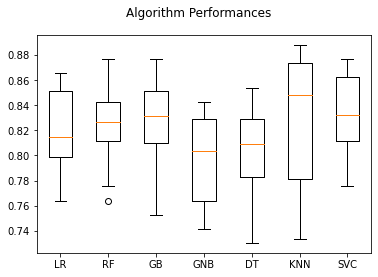

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = []
results = []
names = []

models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier(max_depth=5,random_state = 1)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))


for name, model in models:
    print(name)
    score = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
    print('mean score is: ', score.mean())
    results.append(score)
    names.append(name)
    print('\n')
    
    
fig = plt.figure()
fig.suptitle('Algorithm Performances')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We decide to use Rndom Forest model.

   Pclass_1  Pclass_2  Pclass_3      Fare  Sex_female  Sex_male  Age_Adult  \
0         0         0         1  1.981001           0         1          1   
1         1         0         0  4.266662           1         0          0   
2         0         0         1  2.070022           1         0          1   
3         1         0         0  3.972177           1         0          1   
4         0         0         1  2.085672           0         1          1   

   Age_Child  Age_Senior  Age_Senior Adult  ...  Embarked_S  Title_Master  \
0          0           0                 0  ...           1             0   
1          0           0                 1  ...           0             0   
2          0           0                 0  ...           1             0   
3          0           0                 0  ...           1             0   
4          0           0                 0  ...           1             0   

   Title_Miss  Title_Mr  Title_Mrs  Title_Specialist  FS_Large  FS_M

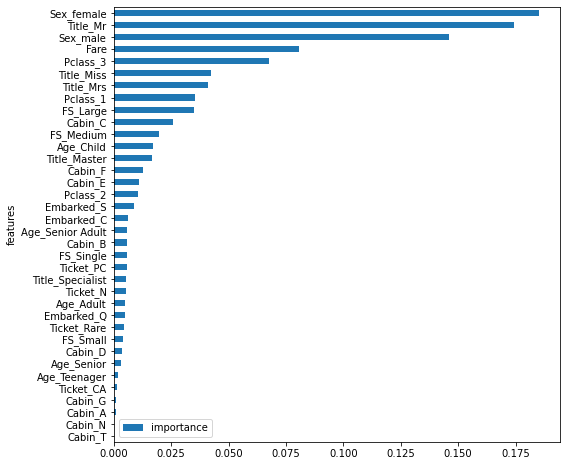

In [43]:
feature_set = pd.DataFrame()
feature_set = allfeatures
print(feature_set.head())

features = pd.DataFrame()
features['features'] = feature_set.columns
features['importance'] = rf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('features', inplace=True)

features.plot(kind='barh', figsize=(8, 8))

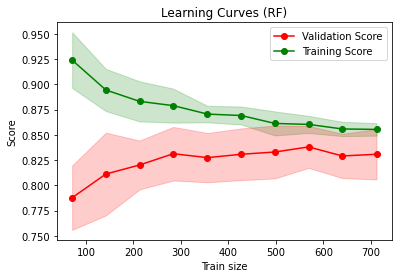

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [44]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, titles, X, y, cv, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    train_sizes, train_scores, test_scores = \
    learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
         label="Validation Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="g",
         label="Training Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="g")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="r")
    
    plt.xlabel("Train size")
    plt.ylabel("Score")
    plt.title(titles)
    plt.legend(loc="best")

    plt.show()
    
    return plt

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
titles = "Learning Curves (RF)"
estimator = RandomForestClassifier(max_depth=5,random_state = 1)
plot_learning_curve(estimator, titles, X, y, cv, train_sizes=np.linspace(.1, 1.0, 10))

## 5.3 Tuning hyperparameters

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [46]:
kfold = StratifiedKFold(n_splits=10)
#parameters = {
#    'n_estimators': [20, 50, 100],
#    'max_depth': [4,5,6],
#    'min_samples_split': [2,3,4],
#    'min_samples_leaf': [1], 
#    'bootstrap': [True], 
#    'random_state':[1]
#    }
#model = RandomForestClassifier()
#GSCV = GridSearchCV(estimator=model,
#                  scoring='accuracy',
#                  n_jobs=4,
#                  param_grid=parameters,
#                  cv=kfold,
#                  verbose=1
#                  )
#GSCV.fit(X, y)
#print('Best Score: ',GSCV.best_score_)
#print('Best Parameter: ',GSCV.best_params_)
#RF = GSCV.best_estimator_

#Best Score:  0.8361548064918851
#Best Parameter:  {'bootstrap': True, 'criterion': 'gini',
#                  'max_depth': 5, 'min_samples_leaf': 1,
#                  'min_samples_split': 3, 'n_estimators': 20,
#                  'random_state': 1}
    
    
RF = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=5, 
                            min_samples_leaf=1, min_samples_split=3, n_estimators=20,
                           random_state=1)

In [47]:
RF.fit(X, y)
prediction_y = RF.predict(X_test).astype(np.int32)
submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': prediction_y})
submission.to_csv('submission_rf12.csv', index=False)